In [1]:
%matplotlib inline

In [2]:
from CoLoRe_corrf_analysis.plot_methods import Plots
from CoLoRe_corrf_analysis.file_funcs import FileFuncs
from CoLoRe_corrf_analysis.fitter import Fitter
from CoLoRe_corrf_analysis.read_colore import ComputeModelsCoLoRe

/home/cramirpe/anaconda3/envs/CoLoRe/lib/python3.9/site-packages/halotools/sim_manager/halo_table_cache.py:12: UserWarning: Some of the functionality of the HaloTableCache classrequires h5py to be installed.
  warn("Some of the functionality of the HaloTableCache class"
/home/cramirpe/anaconda3/envs/CoLoRe/lib/python3.9/site-packages/halotools/sim_manager/halo_table_cache_log_entry.py:14: UserWarning: Most of the functionality of the sim_manager sub-package requires h5py to be installed,
which can be accomplished either with pip or conda. 
  warn("Most of the functionality of the "
/home/cramirpe/anaconda3/envs/CoLoRe/lib/python3.9/site-packages/halotools/sim_manager/user_supplied_ptcl_catalog.py:13: UserWarning: Most of the functionality of the sim_manager sub-package requires h5py to be installed,
which can be accomplished either with pip or conda
  warn("Most of the functionality of the sim_manager "
/home/cramirpe/anaconda3/envs/CoLoRe/lib/python3.9/site-packages/halotools/sim_mana

In [3]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

In [4]:
corrf_files = Path('/mnt/c/Users/crami/Cosmo IFAE Dropbox/César Ramírez/Work/QSO_clustering_analysis/corrf')
colore_boxes = corrf_files.parent / 'CoLoRe_boxes'

In [5]:
theory_path = colore_boxes / 'high_3x2_600'
assert theory_path.is_dir()

theory = ComputeModelsCoLoRe(
    box_path=theory_path,
    source=1,
    apply_lognormal=True)

In [6]:
def get_boxes(path, rsd=False, rmin=0.1, rmax=200, N_bins=41, zmin=0.8, zmax=0.9, nside=2):
    return FileFuncs.mix_sims(
        FileFuncs.get_full_path(path,
                                rsd=rsd, rsd2=None, 
                                rmin=rmin, rmax=rmax, N_bins=N_bins,
                                zmin=zmin, zmax=zmax, nside=2)
    )

In [7]:
class NotebookHelper:
    pass

analyses = []

_ = NotebookHelper()
_.path = corrf_files / 'high_3x2_600'
_.bias_model = 1
_.dens_type = 0
_.boxes = get_boxes(_.path)
analyses.append(_)

_ = NotebookHelper()
_.path = corrf_files / 'high_3x2_600_bias2'
_.bias_model = 2
_.dens_type = 0
_.boxes = get_boxes(_.path)
analyses.append(_)

_ = NotebookHelper()
_.path = corrf_files / 'high_3x2_600_bias3'
_.bias_model = 3
_.dens_type = 0
_.boxes = get_boxes(_.path)
analyses.append(_)

# 2LPT FIELDS (WHENEVER THEY ARE READY)
_ = NotebookHelper()
_.path = corrf_files / 'high_3x2_600'
_.bias_model = 1
_.dens_type = 0
_.boxes = get_boxes(_.path)
analyses.append(_)

_ = NotebookHelper()
_.path = corrf_files / 'high_3x2_600_bias2'
_.bias_model = 2
_.dens_type = 0
_.boxes = get_boxes(_.path)
analyses.append(_)

_ = NotebookHelper()
_.path = corrf_files / 'high_3x2_600_bias3'
_.bias_model = 3
_.dens_type = 0
_.boxes = get_boxes(_.path)
analyses.append(_)

for analysis in analyses:
    assert analysis.path.is_dir()

/home/cramirpe/anaconda3/envs/CoLoRe/lib/python3.9/site-packages/mcfit/mcfit.py:126: UserWarning: The default value of lowring has been changed to False, set it to True if you cannot reproduce previous results
  warnings.warn("The default value of lowring has been changed to False, "
/home/cramirpe/anaconda3/envs/CoLoRe/lib/python3.9/site-packages/mcfit/mcfit.py:217: UserWarning: The default value of extrap has been changed to False, set it to True if you cannot reproduce previous results
  warnings.warn("The default value of extrap has been changed to False, "
/home/cramirpe/anaconda3/envs/CoLoRe/lib/python3.9/site-packages/mcfit/mcfit.py:126: UserWarning: The default value of lowring has been changed to False, set it to True if you cannot reproduce previous results
  warnings.warn("The default value of lowring has been changed to False, "
/home/cramirpe/anaconda3/envs/CoLoRe/lib/python3.9/site-packages/mcfit/mcfit.py:217: UserWarning: The default value of extrap has been changed to F

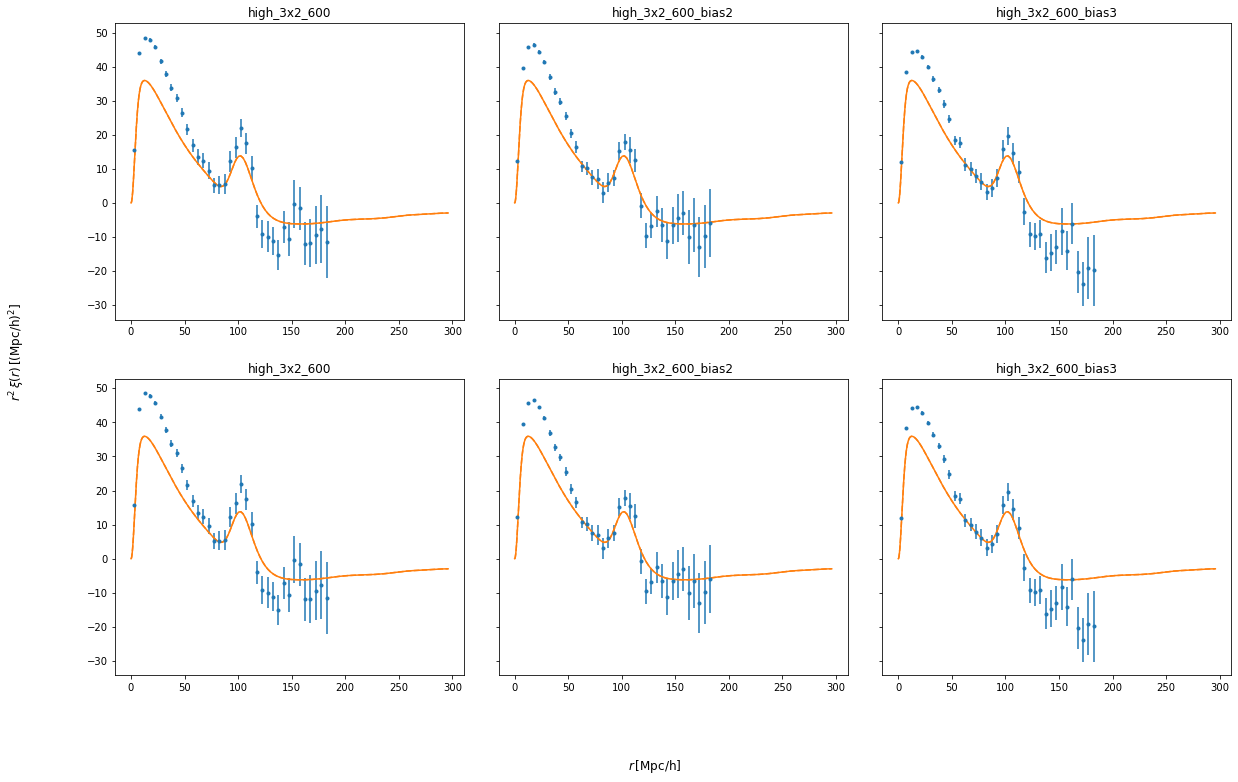

In [16]:
fig, axs = plt.subplots(ncols=3, nrows=2, sharey=True , figsize=(20,12))
z = theory.get_zeff(0.8, 0.9)
pole=0

axs = np.asarray(axs).reshape(-1)
for ax, analysis in zip(axs, analyses):
    Plots.plot_data(pole, analysis.boxes, ax=ax, no_labels=True)
    Plots.plot_theory(pole, z=z, theory=theory, ax=ax, rsd=False, no_labels=True)
    ax.set_title(analysis.path.name)
    
fig.supylabel(r'$r^2 \, \xi(r) \, {\rm [(Mpc/h){^2}]}$', x=0.05)
fig.supxlabel(r'$r \, {\rm [Mpc/h]}$')
plt.subplots_adjust(wspace=0.1)

## Perform fits

In [17]:
for analysis in analyses:
    print(analysis.bias_model)
    analysis.fitter = Fitter(boxes=analysis.boxes, z=z, theory=theory, poles=[0], rsd=False, smooth_factor0=1, bias0=1.6, rmax={0:40})
    analysis.fitter.run_fit(free_params=['bias', 'smooth_factor'])

1


/home/cramirpe/anaconda3/envs/CoLoRe/lib/python3.9/site-packages/mcfit/mcfit.py:126: UserWarning: The default value of lowring has been changed to False, set it to True if you cannot reproduce previous results
  warnings.warn("The default value of lowring has been changed to False, "
/home/cramirpe/anaconda3/envs/CoLoRe/lib/python3.9/site-packages/mcfit/mcfit.py:217: UserWarning: The default value of extrap has been changed to False, set it to True if you cannot reproduce previous results
  warnings.warn("The default value of extrap has been changed to False, "


2
3
1
2
3


/home/cramirpe/anaconda3/envs/CoLoRe/lib/python3.9/site-packages/mcfit/mcfit.py:126: UserWarning: The default value of lowring has been changed to False, set it to True if you cannot reproduce previous results
  warnings.warn("The default value of lowring has been changed to False, "
/home/cramirpe/anaconda3/envs/CoLoRe/lib/python3.9/site-packages/mcfit/mcfit.py:217: UserWarning: The default value of extrap has been changed to False, set it to True if you cannot reproduce previous results
  warnings.warn("The default value of extrap has been changed to False, "
/home/cramirpe/anaconda3/envs/CoLoRe/lib/python3.9/site-packages/mcfit/mcfit.py:126: UserWarning: The default value of lowring has been changed to False, set it to True if you cannot reproduce previous results
  warnings.warn("The default value of lowring has been changed to False, "
/home/cramirpe/anaconda3/envs/CoLoRe/lib/python3.9/site-packages/mcfit/mcfit.py:217: UserWarning: The default value of extrap has been changed to F

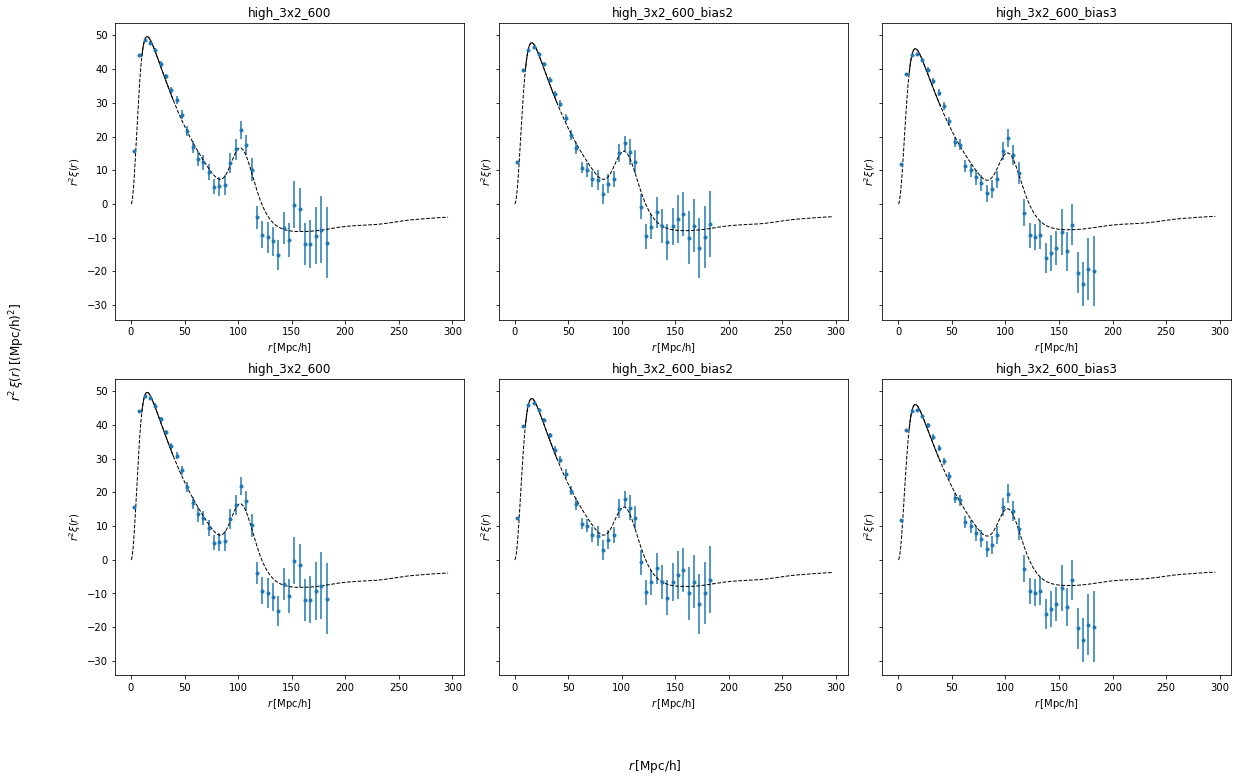

In [18]:
fig, axs = plt.subplots(ncols=3, nrows=2, sharey=True, figsize=(20,12))
pole=0

axs = np.asarray(axs).reshape(-1)
for ax, analysis in zip(axs, analyses):
    Plots.plot_data(pole, analysis.boxes, ax=ax, no_labels=True)
#     Plots.plot_theory(pole, z=z, theory=theory, ax=ax, rsd=False, no_labels=True)
    Plots.plot_best_fit(fitter=analysis.fitter, ax=ax, pole=pole, plot_args=dict(c='k', lw=1))
    ax.set_title(analysis.path.name)
    
fig.supylabel(r'$r^2 \, \xi(r) \, {\rm [(Mpc/h){^2}]}$', x=0.05)
fig.supxlabel(r'$r \, {\rm [Mpc/h]}$')
plt.subplots_adjust(wspace=0.1)